<a href="https://colab.research.google.com/github/Drkareemkamal/LGMVIP_DataScience_task7_HandWriting_Classification/blob/main/Digit_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import liberaries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds

# Load dataset from `tensorflow`

In [2]:
(train,valid) , ds_info = tfds.load('mnist',
                                    as_supervised=True,
                                    with_info=True,
                                    split=['train','test'])

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


# visaulize some samples

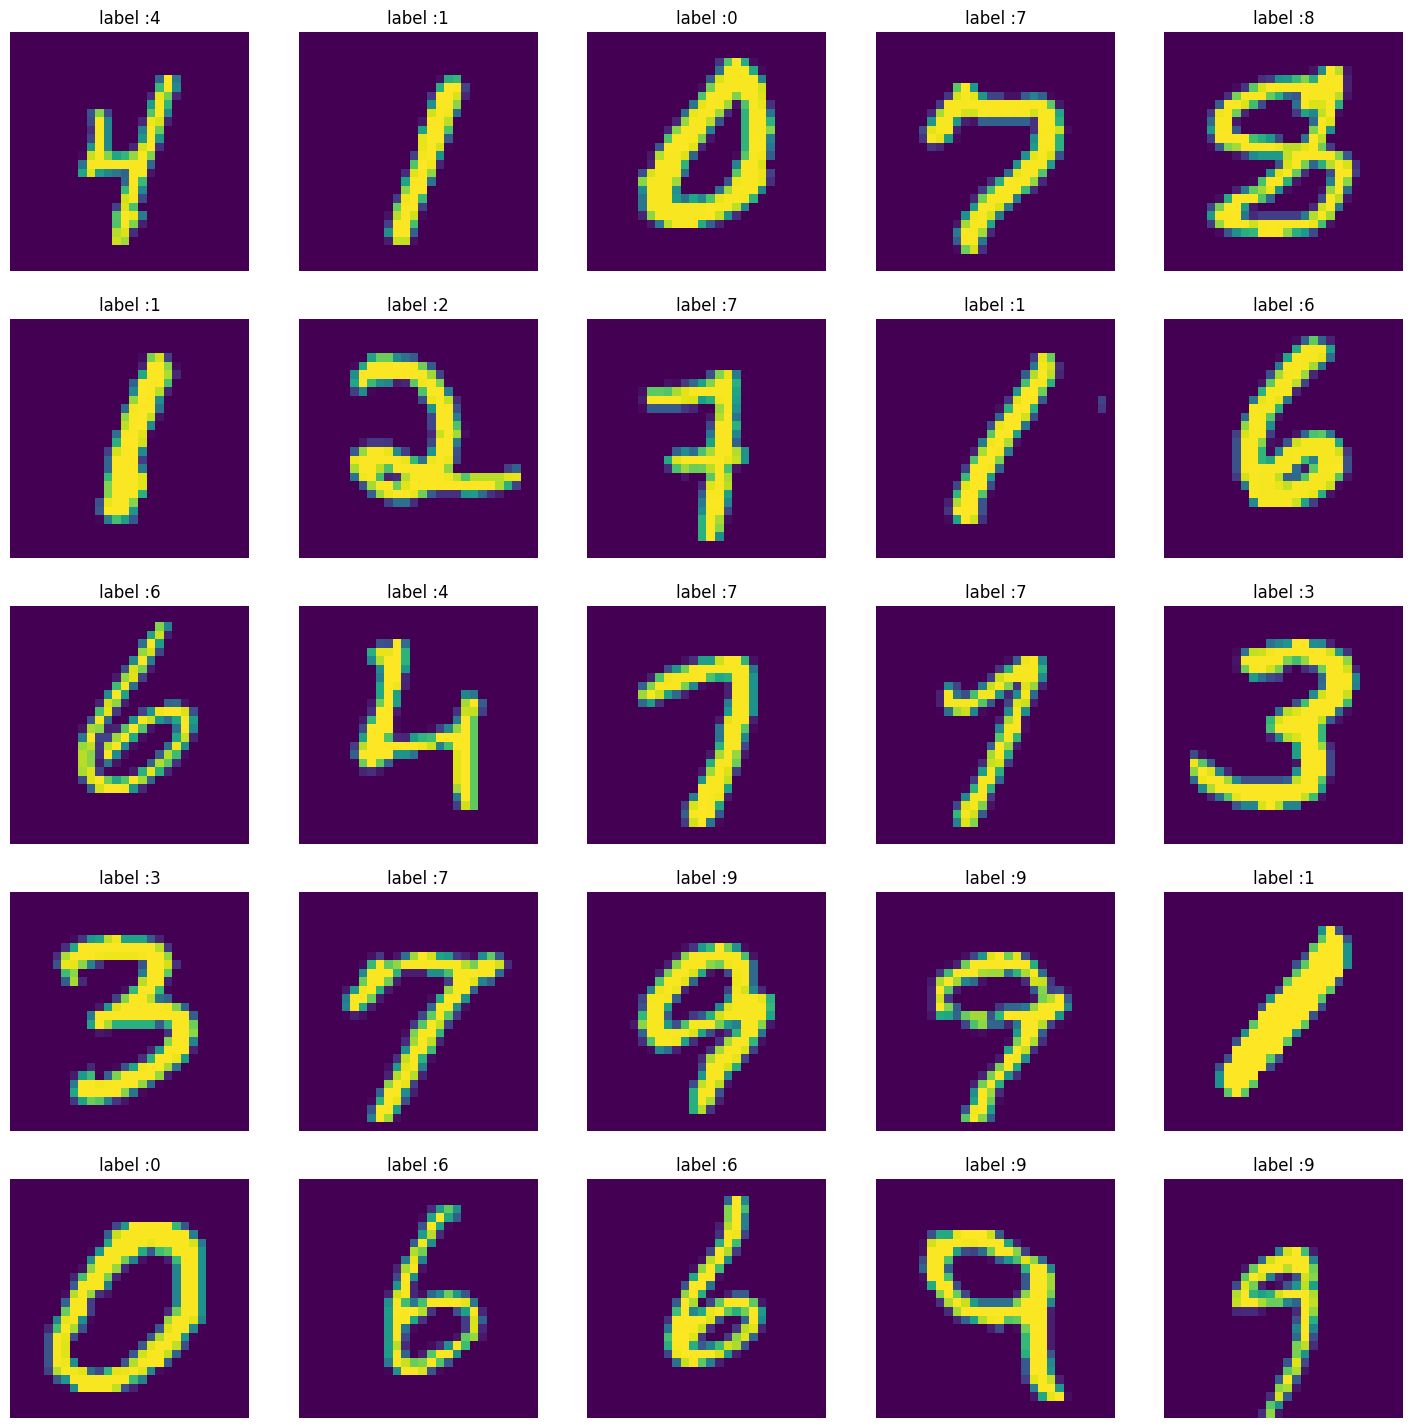

In [36]:
plt.figure(figsize=(18,18))
for i in range(25):
  ax = plt.subplot(5,5,i+1)
  random_img= [i[0] for i in train.take(25)]
  random_label= [i[1] for i in train.take(25)]
  plt.imshow(random_img[i])
  plt.title(f'label :{np.array(random_label[i])}')
  plt.axis(False)

In [4]:
def preprocess_img(img,label):
  img = tf.cast(img,dtype=tf.float32)
  img = img/255.0
  return img,label

In [5]:
train_ds = train.map(map_func=preprocess_img).shuffle(1000)
train_ds = train_ds.batch(batch_size=32).prefetch(tf.data.AUTOTUNE)
test_ds = valid.map(map_func=preprocess_img)
test_ds = test_ds.batch(batch_size=32).prefetch(tf.data.AUTOTUNE)

In [8]:
labels = ds_info.features['label']

In [6]:
train_ds , test_ds

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

# build a CNN model using tensorflow

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,input_shape=(28,28,1),activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),

    tf.keras.layers.Dense(labels.num_classes,activation='softmax')
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer= tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

hist = model.fit(train_ds,epochs=10,
                 validation_data = test_ds)

Epoch 1/10
1875/1875 [==============================] - 26s 8ms/step - loss: 0.1619 - accuracy: 0.9489 - val_loss: 0.0454 - val_accuracy: 0.9852
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0567 - accuracy: 0.9821 - val_loss: 0.0375 - val_accuracy: 0.9885
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0423 - accuracy: 0.9863 - val_loss: 0.0356 - val_accuracy: 0.9890
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0345 - accuracy: 0.9890 - val_loss: 0.0446 - val_accuracy: 0.9864
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0288 - accuracy: 0.9906 - val_loss: 0.0298 - val_accuracy: 0.9915
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0244 - accuracy: 0.9919 - val_loss: 0.0261 - val_accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0224 - accuracy: 0.9929 - val_loss: 0.0268 - val_ac

## Plot Our Training and Validation loss and Training and Validation Accuracy


In [10]:
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()


  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

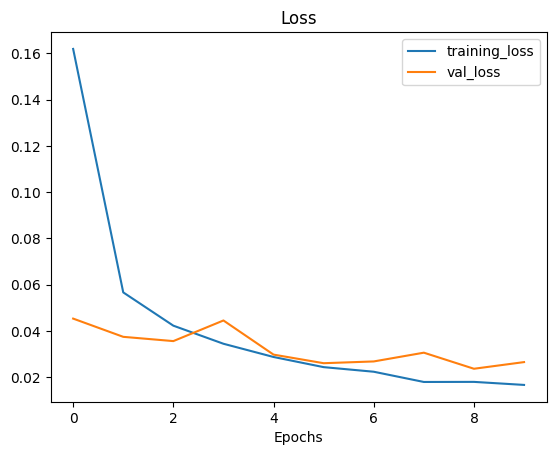

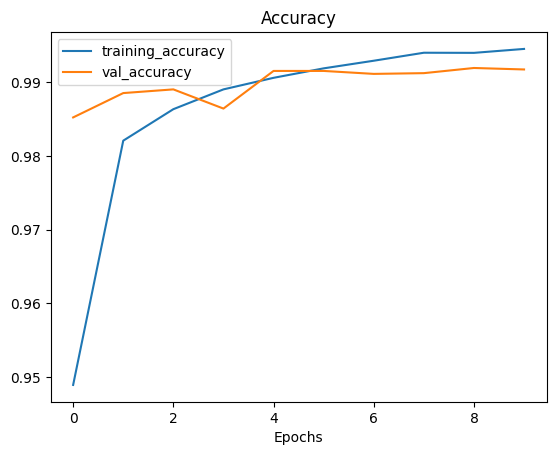

In [12]:
#plot our history
plot_loss_curves(hist)

# test our model prediction

In [21]:
lab =
rand_test_img= [i[0] for i in valid.take(9)]
y_pred_test = model.predict(np.array(rand_test_img))
np.argmax(y_pred_test)

1/1 [==============================] - 0s 19ms/step


2

1/1 [==============================] - 0s 20ms/step


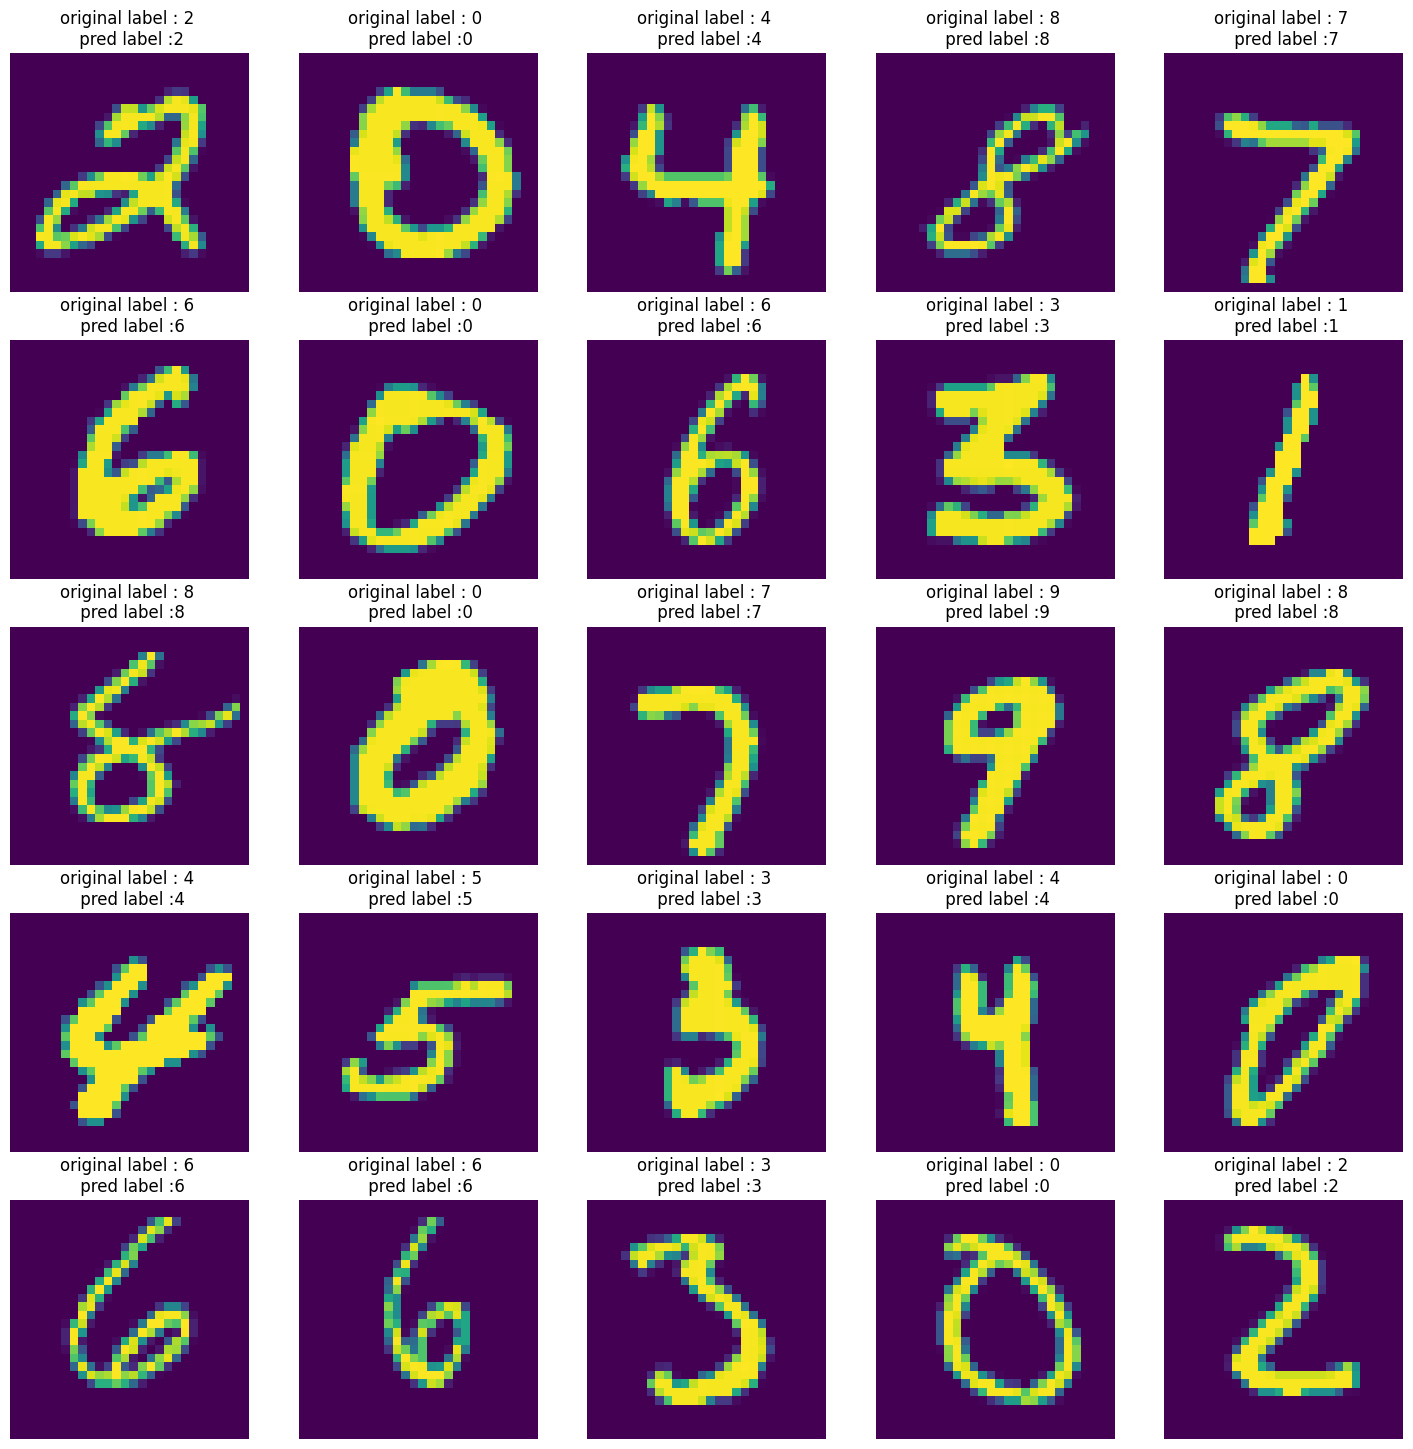

In [34]:
plt.figure(figsize=(18,18))
for i in range(25):
  ax = plt.subplot(5,5,i+1)
  rand_test_img= [i[0] for i in valid.take(25)]
  original_label= [i[1] for i in valid.take(25)]

  y_pred_test = model.predict(np.array(rand_test_img))
  pred_label = np.argmax(y_pred_test[i])
  plt.imshow(rand_test_img[i])
  plt.title(f'original label : {original_label[i]} \n pred label :{np.argmax(y_pred_test[i])}')
  plt.axis(False)